In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cross_validation import train_test_split

/Users/jedvillareal/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
train = pd.read_csv('train.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test = pd.read_csv('test.csv')

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
data = train.append(test, ignore_index = True)

/Users/jedvillareal/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [12]:
data['Survived'].value_counts()[1]

342

In [13]:
492 - data['Survived'].value_counts()[1]

150

In [14]:
missing = data.isnull().sum()
missing[missing > 0]

Age          263
Cabin       1014
Embarked       2
Fare           1
Survived     418
dtype: int64

In [15]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
pd.pivot_table(data, index = ['Pclass', 'Sex'], columns = 'Parch', values = 'Survived', 
               aggfunc=np.count_nonzero, margins = True, dropna = True, fill_value = (0))

#Pclass 3 has the most people that survived
#More # females survived than # of males

Parch            0   1   2  3  4  5  6  9    All
Pclass Sex                                      
1      female   96  29  14  1  1  0  0  0   91.0
       male     82  11   8  1  0  0  0  0   45.0
2      female   56  23  18  3  0  0  0  0   70.0
       male     64  12   4  0  0  0  0  0   17.0
3      female  100  22  18  1  1  1  0  1   72.0
       male    159  20  11  0  0  1  1  1   47.0
All            233  65  40  3  0  1  0  0  342.0

In [17]:
pd.pivot_table(data, index = ['Pclass', 'Sex'], columns = 'SibSp', values = 'Survived', 
               aggfunc=np.count_nonzero, margins = True, dropna = True, fill_value = (0))

SibSp            0    1   2  3  4  5  8    All
Pclass Sex                                    
1      female   74   59   5  3  0  0  0   91.0
       male     64   36   2  0  0  0  0   45.0
2      female   57   37   5  1  0  0  0   70.0
       male     55   22   3  0  0  0  0   17.0
3      female   94   38   6  1  3  1  1   72.0
       male    149   30   6  3  4  0  1   47.0
All            210  112  13  4  3  0  0  342.0

In [18]:
data.groupby(['Survived','Sex','SibSp']).count()['PassengerId']

Survived  Sex     SibSp
0.0       female  0         37
                  1         26
                  2          3
                  3          7
                  4          4
                  5          1
                  8          3
          male    0        361
                  1         71
                  2         12
                  3          5
                  4         11
                  5          4
                  8          4
1.0       female  0        137
                  1         80
                  2         10
                  3          4
                  4          2
          male    0         73
                  1         32
                  2          3
                  4          1
Name: PassengerId, dtype: int64

In [19]:
data.groupby(['Survived','Sex','Parch']).count()['PassengerId']

Survived  Sex     Parch
0.0       female  0         41
                  1         14
                  2         19
                  3          1
                  4          2
                  5          3
                  6          1
          male    0        404
                  1         39
                  2         21
                  3          1
                  4          2
                  5          1
1.0       female  0        153
                  1         46
                  2         30
                  3          3
                  5          1
          male    0         80
                  1         19
                  2         10
Name: PassengerId, dtype: int64

In [20]:
rose = data.copy()

In [21]:
rose['familysize'] = rose['Parch'] + rose ['SibSp'] + 1

In [22]:
rose.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,familysize
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1


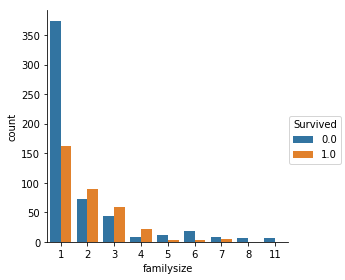

In [23]:
sns.factorplot('familysize', data=rose, hue = 'Survived', kind = 'count')

In [24]:
pd.pivot_table(rose, index = ['Pclass', 'Sex'], columns = 'familysize', values = 'Survived', 
               aggfunc=np.count_nonzero, margins = True, dropna = True, fill_value = (0))

familysize       1   2   3   4  5  6  7  8  11    All
Pclass Sex                                           
1      female   51  59  21   3  3  4  0  0   0   91.0
       male     58  26  12   4  2  0  0  0   0   45.0
2      female   39  24  20  15  1  1  0  0   0   70.0
       male     51  12  15   2  0  0  0  0   0   17.0
3      female   77  24  27   8  1  0  4  1   2   72.0
       male    140  18  21   3  3  1  4  1   2   47.0
All            163  89  59  21  3  3  4  0   0  342.0

In [25]:
rose['familysize'].replace([1], 0, inplace = True)
rose.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,familysize
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,0
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,0
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,5
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,3
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,2


In [26]:
rose['familysize'].replace([2,3,4], 1, inplace = True)
rose['familysize'].replace([5,6,7,8,9,10,11], 2, inplace = True)
rose.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,familysize
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,0
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,0
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,2
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,1
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,1


In [27]:
kids = rose[rose['Age'] < 12]
adults = rose[rose['Age'] >=12 ]
kids.count()

Age            91
Cabin          13
Embarked       91
Fare           91
Name           91
Parch          91
PassengerId    91
Pclass         91
Sex            91
SibSp          91
Survived       68
Ticket         91
familysize     91
dtype: int64

In [28]:
adults.count()

Age            955
Cabin          259
Embarked       953
Fare           954
Name           955
Parch          955
PassengerId    955
Pclass         955
Sex            955
SibSp          955
Survived       646
Ticket         955
familysize     955
dtype: int64

In [29]:
train[train['Age'] < 12][train['Survived'] == 1].count()

/Users/jedvillareal/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


PassengerId    39
Survived       39
Pclass         39
Name           39
Sex            39
Age            39
SibSp          39
Parch          39
Ticket         39
Fare           39
Cabin           9
Embarked       39
dtype: int64

In [30]:
#children - 1, 0
#family size - 1,2,3??
#drop age
#cabin
#embarked
#rich - survival rate affected? pclass?
#

In [31]:
z = rose[(rose['Age'] < 12) & (rose['Survived'] == 0)]
z.Sex.value_counts()

male      16
female    13
Name: Sex, dtype: int64

In [32]:
rose.groupby(['Survived','Sex'])['Fare'].count()

Survived  Sex   
0.0       female     81
          male      468
1.0       female    233
          male      109
Name: Fare, dtype: int64

In [33]:
missing = rose.isnull().sum()
missing[missing > 0]

Age          263
Cabin       1014
Embarked       2
Fare           1
Survived     418
dtype: int64

In [34]:
jack = rose.copy()

In [35]:
jack.Name

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
5                                        Moran, Mr. James
6                                 McCarthy, Mr. Timothy J
7                          Palsson, Master. Gosta Leonard
8       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                     Nasser, Mrs. Nicholas (Adele Achem)
10                        Sandstrom, Miss. Marguerite Rut
11                               Bonnell, Miss. Elizabeth
12                         Saundercock, Mr. William Henry
13                            Andersson, Mr. Anders Johan
14                   Vestrom, Miss. Hulda Amanda Adolfina
15                       Hewlett, Mrs. (Mary D Kingcome) 
16                                   Rice, Master. Eugene
17            

In [36]:
jack.Name.str.split(',')[0][1].split('.')[0].strip()

'Mr'

In [37]:
jack['title'] = jack['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())

In [38]:
jack.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,familysize,title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,Mr


In [39]:
jack['title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Ms                2
Mlle              2
the Countess      1
Don               1
Capt              1
Jonkheer          1
Sir               1
Lady              1
Dona              1
Mme               1
Name: title, dtype: int64

In [40]:
jack['title'].replace(['Dona','Mme','Lady','the Countess','Ms'], 'Mrs', inplace = True)
jack['title'].replace(['Capt','Don','Sir','Jonkheer','Major','Col','Rev','Dr'], 'Mr', inplace = True)
jack['title'].replace(['Mlle'], 'Miss', inplace = True)
jack['title'].value_counts()

Mr        783
Miss      262
Mrs       203
Master     61
Name: title, dtype: int64

In [41]:
jack.groupby('title')['Age'].median()

title
Master     4.0
Miss      22.0
Mr        30.0
Mrs       35.0
Name: Age, dtype: float64

In [42]:
x = jack.groupby('title')['Age'].median()
x

title
Master     4.0
Miss      22.0
Mr        30.0
Mrs       35.0
Name: Age, dtype: float64

In [43]:
jr = jack.copy()

In [44]:
jr[(jr['Age'].isnull())&(jr['title'] == 'Master')] = jr['Age'].fillna(x[0], inplace = True)
jr[(jr['Age'].isnull())&(jr['title'] == 'Miss')] = jr['Age'].fillna(x[1], inplace = True)
jr[(jr['Age'].isnull())&(jr['title'] == 'Mr')] = jr['Age'].fillna(x[2], inplace = True)
jr[(jr['Age'].isnull())&(jr['title'] == 'Mrs')] = jr['Age'].fillna(x[3], inplace = True)

In [45]:
jr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null float64
PassengerId    1309 non-null float64
Pclass         1309 non-null float64
Sex            1309 non-null object
SibSp          1309 non-null float64
Survived       891 non-null float64
Ticket         1309 non-null object
familysize     1309 non-null float64
title          1309 non-null object
dtypes: float64(8), object(6)
memory usage: 143.2+ KB


In [46]:
jr.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,familysize,title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0.0,1.0,3.0,male,1.0,0.0,A/5 21171,1.0,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,2.0,1.0,female,1.0,1.0,PC 17599,1.0,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0.0,3.0,3.0,female,0.0,1.0,STON/O2. 3101282,0.0,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,4.0,1.0,female,1.0,1.0,113803,1.0,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0.0,5.0,3.0,male,0.0,0.0,373450,0.0,Mr


In [47]:
jr.groupby(['Pclass','Embarked'])['Fare'].mean()

Pclass  Embarked
1.0     C           106.845330
        Q            90.000000
        S            72.148094
2.0     C            23.300593
        Q            11.735114
        S            21.206921
3.0     C            11.021624
        Q            10.390820
        S            14.435422
Name: Fare, dtype: float64

In [48]:
jr['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [49]:
jr[jr['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,familysize,title
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0.0,62.0,1.0,female,0.0,1.0,113572,0.0,Miss
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0.0,830.0,1.0,female,0.0,1.0,113572,0.0,Mrs


In [50]:
jr['Embarked'].fillna(jr['Embarked'].mode()[0], inplace = True)

In [51]:
jr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null float64
PassengerId    1309 non-null float64
Pclass         1309 non-null float64
Sex            1309 non-null object
SibSp          1309 non-null float64
Survived       891 non-null float64
Ticket         1309 non-null object
familysize     1309 non-null float64
title          1309 non-null object
dtypes: float64(8), object(6)
memory usage: 143.2+ KB


In [52]:
jr[jr['Age'] < 12].count()

Age            354
Cabin           36
Embarked       354
Fare           354
Name           354
Parch          354
PassengerId    354
Pclass         354
Sex            354
SibSp          354
Survived       245
Ticket         354
familysize     354
title          354
dtype: int64

In [53]:
boat = jr.copy()

In [54]:
boat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null float64
PassengerId    1309 non-null float64
Pclass         1309 non-null float64
Sex            1309 non-null object
SibSp          1309 non-null float64
Survived       891 non-null float64
Ticket         1309 non-null object
familysize     1309 non-null float64
title          1309 non-null object
dtypes: float64(8), object(6)
memory usage: 143.2+ KB


In [55]:
boat.groupby(['Pclass', 'Embarked'])['Fare'].mean()

Pclass  Embarked
1.0     C           106.845330
        Q            90.000000
        S            72.235825
2.0     C            23.300593
        Q            11.735114
        S            21.206921
3.0     C            11.021624
        Q            10.390820
        S            14.435422
Name: Fare, dtype: float64

In [56]:
boat['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [57]:
boat[boat['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,familysize,title


In [58]:
boat['Embarked'].fillna(boat['Embarked'].mode()[0], inplace = True)
boat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null float64
PassengerId    1309 non-null float64
Pclass         1309 non-null float64
Sex            1309 non-null object
SibSp          1309 non-null float64
Survived       891 non-null float64
Ticket         1309 non-null object
familysize     1309 non-null float64
title          1309 non-null object
dtypes: float64(8), object(6)
memory usage: 143.2+ KB


In [59]:
boat[boat['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,familysize,title
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0.0,1044.0,3.0,male,0.0,NaN,3701,0.0,Mr


In [60]:
Bmean = boat.groupby('Embarked').mean()['Fare']
Bmean[2]

27.53375540983602

In [61]:
boat['Fare'].fillna(Bmean[2], inplace = True)
boat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null float64
PassengerId    1309 non-null float64
Pclass         1309 non-null float64
Sex            1309 non-null object
SibSp          1309 non-null float64
Survived       891 non-null float64
Ticket         1309 non-null object
familysize     1309 non-null float64
title          1309 non-null object
dtypes: float64(8), object(6)
memory usage: 143.2+ KB


In [62]:
boat1 = boat.copy()

In [63]:
boat.groupby(['Pclass','Cabin'])['Fare'].mean()

Pclass  Cabin
1.0     A10       40.125000
        A11       27.720800
        A14       52.000000
        A16       39.600000
        A18       29.700000
        A19       26.000000
        A20       56.929200
        A21       30.500000
        A23       30.000000
        A24       50.495800
        A26       35.500000
        A29       31.679200
        A31       31.000000
        A32       50.000000
        A34       81.858300
        A36        0.000000
        A5        34.654200
        A6        35.500000
        A7        30.695800
        A9        29.700000
        B10       50.495800
        B101     512.329200
        B102       0.000000
        B11       42.500000
        B18       57.979200
        B19       33.500000
        B20       57.000000
        B22       71.000000
        B24       93.500000
        B26       26.550000
                    ...    
        E45       83.158300
        E46       51.862500
        E49       83.158300
        E50       55.441700
      

In [64]:
boat['Cabin'].fillna('Unknown', inplace = True)

In [65]:
boat['Cabin'].nunique()

187

In [66]:
(boat['Cabin'][0][0])

'U'

In [67]:
boat['Deck'] = boat['Cabin'].apply(lambda x: x[0])
boat['Deck'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

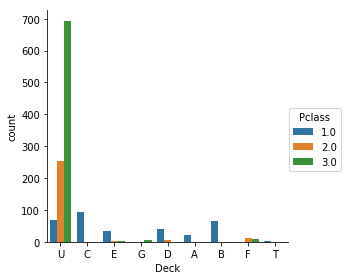

In [68]:
sns.factorplot('Deck', data=boat, hue = 'Pclass', kind = 'count')

In [69]:
boat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null float64
PassengerId    1309 non-null float64
Pclass         1309 non-null float64
Sex            1309 non-null object
SibSp          1309 non-null float64
Survived       891 non-null float64
Ticket         1309 non-null object
familysize     1309 non-null float64
title          1309 non-null object
Deck           1309 non-null object
dtypes: float64(8), object(7)
memory usage: 153.5+ KB


In [70]:
u = boat[(boat['Deck'] == 'U')&(boat['Pclass'] == 1)].count()
u

Age            67
Cabin          67
Embarked       67
Fare           67
Name           67
Parch          67
PassengerId    67
Pclass         67
Sex            67
SibSp          67
Survived       40
Ticket         67
familysize     67
title          67
Deck           67
dtype: int64

In [71]:
boaty=boat.copy()

In [72]:
for i in range(len(boaty)):
    if (boaty['Pclass'][i] == 1):
        if boaty['Deck'][i] == 'U':
            boaty['Deck'][i] = 'B'
    elif (boaty['Pclass'][i] == 2):
        if (boaty['Deck'][i] == 'U'):
             boaty['Deck'][i] = 'F'
    elif (boaty['Pclass'][i] == 3):
        if (boaty['Deck'][i] == 'U'):
             boaty['Deck'][i] = 'F'

/Users/jedvillareal/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/jedvillareal/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/jedvillareal/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-v

In [73]:
boaty['Deck'].value_counts()

F    968
B    132
C     94
D     46
E     41
A     22
G      5
T      1
Name: Deck, dtype: int64

In [74]:
d = {'A':1, 'B':1, 'C':1, 'D':1, 'E':1, 'F':0, 'G':0, 'T':0}

boaty['Rich'] = boaty['Deck'].map(d)

##T not a passenger deck - check not a passenger deck, crew deck

In [75]:
boaty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null float64
PassengerId    1309 non-null float64
Pclass         1309 non-null float64
Sex            1309 non-null object
SibSp          1309 non-null float64
Survived       891 non-null float64
Ticket         1309 non-null object
familysize     1309 non-null float64
title          1309 non-null object
Deck           1309 non-null object
Rich           1309 non-null int64
dtypes: float64(8), int64(1), object(7)
memory usage: 163.7+ KB


In [136]:
jar = boat.copy()

In [137]:
jar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null float64
PassengerId    1309 non-null float64
Pclass         1309 non-null float64
Sex            1309 non-null object
SibSp          1309 non-null float64
Survived       891 non-null float64
Ticket         1309 non-null object
familysize     1309 non-null float64
title          1309 non-null object
Deck           1309 non-null object
dtypes: float64(8), object(7)
memory usage: 153.5+ KB


In [138]:
x = jar[jar['Age'] < 12]
x.count()

Age            354
Cabin          354
Embarked       354
Fare           354
Name           354
Parch          354
PassengerId    354
Pclass         354
Sex            354
SibSp          354
Survived       245
Ticket         354
familysize     354
title          354
Deck           354
dtype: int64

In [139]:
y = jar[jar['Age'] >= 12]
y.count()

Age            955
Cabin          955
Embarked       955
Fare           955
Name           955
Parch          955
PassengerId    955
Pclass         955
Sex            955
SibSp          955
Survived       646
Ticket         955
familysize     955
title          955
Deck           955
dtype: int64

In [140]:
jar['Adult'] = jar['Age'].apply(lambda z: ((z >= 12)))
jar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null float64
PassengerId    1309 non-null float64
Pclass         1309 non-null float64
Sex            1309 non-null object
SibSp          1309 non-null float64
Survived       891 non-null float64
Ticket         1309 non-null object
familysize     1309 non-null float64
title          1309 non-null object
Deck           1309 non-null object
Adult          1309 non-null bool
dtypes: bool(1), float64(8), object(7)
memory usage: 154.8+ KB


In [141]:
jar.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,familysize,title,Deck,Adult
0,22.0,Unknown,S,7.2500,"Braund, Mr. Owen Harris",0.0,1.0,3.0,male,1.0,0.0,A/5 21171,1.0,Mr,U,True
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,2.0,1.0,female,1.0,1.0,PC 17599,1.0,Mrs,C,True
2,26.0,Unknown,S,7.9250,"Heikkinen, Miss. Laina",0.0,3.0,3.0,female,0.0,1.0,STON/O2. 3101282,0.0,Miss,U,True
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,4.0,1.0,female,1.0,1.0,113803,1.0,Mrs,C,True
4,35.0,Unknown,S,8.0500,"Allen, Mr. William Henry",0.0,5.0,3.0,male,0.0,0.0,373450,0.0,Mr,U,True


In [142]:
jar['Adult'] = jar['Adult'].astype(str)

In [143]:
d = {'True':1, 'False':0}
jar['Adult'] = jar['Adult'].map(d)
jar.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,familysize,title,Deck,Adult
0,22.0,Unknown,S,7.2500,"Braund, Mr. Owen Harris",0.0,1.0,3.0,male,1.0,0.0,A/5 21171,1.0,Mr,U,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,2.0,1.0,female,1.0,1.0,PC 17599,1.0,Mrs,C,1
2,26.0,Unknown,S,7.9250,"Heikkinen, Miss. Laina",0.0,3.0,3.0,female,0.0,1.0,STON/O2. 3101282,0.0,Miss,U,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,4.0,1.0,female,1.0,1.0,113803,1.0,Mrs,C,1
4,35.0,Unknown,S,8.0500,"Allen, Mr. William Henry",0.0,5.0,3.0,male,0.0,0.0,373450,0.0,Mr,U,1


In [144]:
jar['familysize'] = jar['familysize'].astype(object)
jar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null float64
PassengerId    1309 non-null float64
Pclass         1309 non-null float64
Sex            1309 non-null object
SibSp          1309 non-null float64
Survived       891 non-null float64
Ticket         1309 non-null object
familysize     1309 non-null object
title          1309 non-null object
Deck           1309 non-null object
Adult          1309 non-null int64
dtypes: float64(7), int64(1), object(8)
memory usage: 163.7+ KB


In [145]:
del jar['Cabin']
del jar['Name']
del jar['Parch']
del jar['SibSp']
del jar['PassengerId']
del jar['Ticket']
del jar['Fare']
del jar['Age']

In [146]:
jar['Pclass'] = jar['Pclass'].astype(object)

In [147]:
jar = pd.get_dummies(jar, drop_first = True)
jar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 20 columns):
Survived          891 non-null float64
Adult             1309 non-null int64
Embarked_Q        1309 non-null uint8
Embarked_S        1309 non-null uint8
Pclass_2.0        1309 non-null uint8
Pclass_3.0        1309 non-null uint8
Sex_male          1309 non-null uint8
familysize_1.0    1309 non-null uint8
familysize_2.0    1309 non-null uint8
title_Miss        1309 non-null uint8
title_Mr          1309 non-null uint8
title_Mrs         1309 non-null uint8
Deck_B            1309 non-null uint8
Deck_C            1309 non-null uint8
Deck_D            1309 non-null uint8
Deck_E            1309 non-null uint8
Deck_F            1309 non-null uint8
Deck_G            1309 non-null uint8
Deck_T            1309 non-null uint8
Deck_U            1309 non-null uint8
dtypes: float64(1), int64(1), uint8(18)
memory usage: 43.5 KB


In [148]:
jar.tail(20)

,Survived,Adult,Embarked_Q,Embarked_S,Pclass_2.0,Pclass_3.0,Sex_male,familysize_1.0,familysize_2.0,title_Miss,title_Mr,title_Mrs,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
1289,NaN,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1290,NaN,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1291,NaN,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1292,NaN,1,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1
1293,NaN,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1294,NaN,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1295,NaN,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0
1296,NaN,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1297,NaN,1,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1
1298,NaN,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0


In [149]:
jard = jar.copy()

In [150]:
x = jard[jar['Survived']==1]
y = jard[jar['Survived']==0]
jardtrain = x.append(y, ignore_index = True)
jardtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
Survived          891 non-null float64
Adult             891 non-null int64
Embarked_Q        891 non-null uint8
Embarked_S        891 non-null uint8
Pclass_2.0        891 non-null uint8
Pclass_3.0        891 non-null uint8
Sex_male          891 non-null uint8
familysize_1.0    891 non-null uint8
familysize_2.0    891 non-null uint8
title_Miss        891 non-null uint8
title_Mr          891 non-null uint8
title_Mrs         891 non-null uint8
Deck_B            891 non-null uint8
Deck_C            891 non-null uint8
Deck_D            891 non-null uint8
Deck_E            891 non-null uint8
Deck_F            891 non-null uint8
Deck_G            891 non-null uint8
Deck_T            891 non-null uint8
Deck_U            891 non-null uint8
dtypes: float64(1), int64(1), uint8(18)
memory usage: 29.7 KB


In [151]:
jardtest = jard[jard['Survived'].isnull()]
jardtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 20 columns):
Survived          0 non-null float64
Adult             418 non-null int64
Embarked_Q        418 non-null uint8
Embarked_S        418 non-null uint8
Pclass_2.0        418 non-null uint8
Pclass_3.0        418 non-null uint8
Sex_male          418 non-null uint8
familysize_1.0    418 non-null uint8
familysize_2.0    418 non-null uint8
title_Miss        418 non-null uint8
title_Mr          418 non-null uint8
title_Mrs         418 non-null uint8
Deck_B            418 non-null uint8
Deck_C            418 non-null uint8
Deck_D            418 non-null uint8
Deck_E            418 non-null uint8
Deck_F            418 non-null uint8
Deck_G            418 non-null uint8
Deck_T            418 non-null uint8
Deck_U            418 non-null uint8
dtypes: float64(1), int64(1), uint8(18)
memory usage: 17.1 KB


In [152]:
from sklearn.model_selection import train_test_split as tts

In [153]:
Xjard = jardtrain.drop('Survived', axis = 1)
yjard = jardtrain['Survived']

Xjardtrain, Xjardtest, yjardtrain, yjardtest = tts(Xjard, yjard, test_size = .2, random_state = 0)

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [155]:
l = LinearRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
g = GradientBoostingClassifier()

In [156]:
lr = l.fit(Xjardtrain, yjardtrain)
dr = d.fit(Xjardtrain, yjardtrain)
rr = r.fit(Xjardtrain, yjardtrain)
gr = g.fit(Xjardtrain, yjardtrain)

In [157]:
print("Logistic Regression: ", lr.score(Xjardtrain, yjardtrain))
print("Decision Tree: ", dr.score(Xjardtrain, yjardtrain))
print("Random Forest: ", rr.score(Xjardtrain, yjardtrain))
print("Gradient Boost: ", gr.score(Xjardtrain, yjardtrain))

Logistic Regression:  0.48809724802847243
Decision Tree:  0.8679775280898876
Random Forest:  0.8623595505617978
Gradient Boost:  0.8637640449438202


In [158]:
print("Logistic Regression: ", lr.score(Xjardtest, yjardtest))
print("Decision Tree: ", dr.score(Xjardtest, yjardtest))
print("Random Forest: ", rr.score(Xjardtest, yjardtest))
print("Gradient Boost: ", gr.score(Xjardtest, yjardtest))

Logistic Regression:  0.34719086717595415
Decision Tree:  0.8100558659217877
Random Forest:  0.7877094972067039
Gradient Boost:  0.7988826815642458


In [159]:
X = jardtest.drop('Survived',axis=1)

In [160]:
l1 = lr.predict(X)
sum(l1) 

170.4173222528887

In [161]:
r1 = rr.predict(X)
sum(r1)

148.0

In [162]:
d1 = dr.predict(X)
sum(d1)

140.0

In [163]:
g1 = gr.predict(X)
sum(g1)

161.0

In [166]:
Results = pd.DataFrame(columns = ['PassengerId', 'Survived'])
Results['PassengerId'] = test['PassengerId']
Results['Survived'] = d1.astype(int)
Results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [167]:
Results.to_csv('t3.csv',header=True, index=False)